# Классификация стёкл на основе их состава

![](steclo.jpg)

## 1) Импорт библиотек и загрузка датасета

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [172]:
data = pd.read_csv('glass.csv')

## 2) EDA

In [173]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


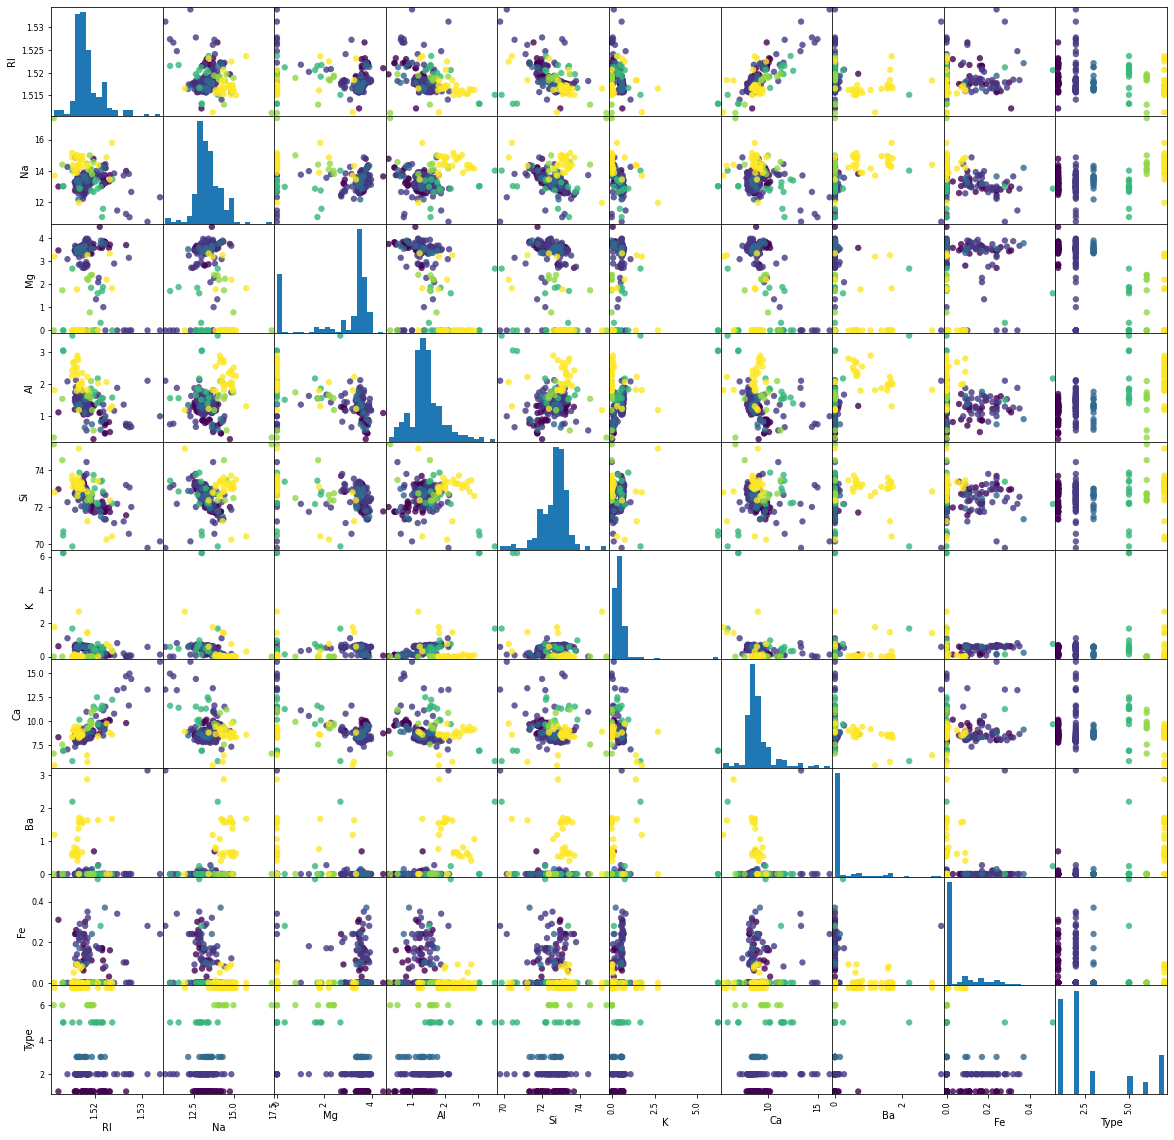

In [175]:
data_mtrx = pd.plotting.scatter_matrix(data, c=data.Type, figsize=(20, 20), marker='o', hist_kwds={'bins':20}, s=40, alpha=0.8)

In [176]:
target = data['Type']

In [177]:
target.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [178]:
data=data.drop(['Type'], axis=1)

## Что дал разведочный анализ:
* данных очень мало
* отсутствует класс 4
* пропущенных значений нет

In [237]:
X_train, X_val, y_train, y_val = train_test_split(data.values, target, test_size = 0.35, random_state=22) 

In [238]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((139, 9), (75, 9), (139,), (75,))

### Создание модели

In [239]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_model = knn.fit(X_train, y_train)

In [240]:
knn_predictions = knn.predict(X_val)
knn_predictions_train = knn.predict(X_train)

In [243]:
accuracy = accuracy_score(y_val, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.68


In [244]:
accuracy = accuracy_score(y_train, knn_predictions_train)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7482014388489209
